# Setup

In [12]:
%matplotlib notebook

import datetime as dt

import lot_monitor

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
plt.rcParams['figure.figsize'] = [9.0, 6.0]  # default is 6"x4"

In [3]:
session = lot_monitor.get_session()

# Queries / Plots

In [4]:
lots = session.query(lot_monitor.OpenSpaces.lot).group_by(lot_monitor.OpenSpaces.lot).all()
lots = [l[0] for l in lots]

In [5]:
lots

['Lot 1 Crittenden',
 'Lot 11 Crittenden Evening',
 'Lot 12 Crittenden Reserved',
 'Lot 13 Hospital Garage',
 'Lot 14 Saunders',
 'Lot 2 Lattimore',
 'Lot 24 Scottsville Road',
 'Lot 3 Kendrick North',
 'Lot 33 College Town Garage',
 'Lot 5 East Drive',
 'Lot 6 Middle Drive',
 'Lot 8 Medical School',
 'Lot 9 Kendrick South']

In [15]:
def get_lot_history(lotname):
    lot_history = session.query(lot_monitor.OpenSpaces).\
                    filter_by(lot=lotname).\
                    order_by(lot_monitor.OpenSpaces.checked_gmt).\
                    all()
    times  = [h.checked_gmt.replace(tzinfo=dt.timezone.utc).astimezone(tz=None) for h in lot_history]
    spaces = [h.spaces for h in lot_history]
    return times, spaces

<IPython.core.display.Javascript object>


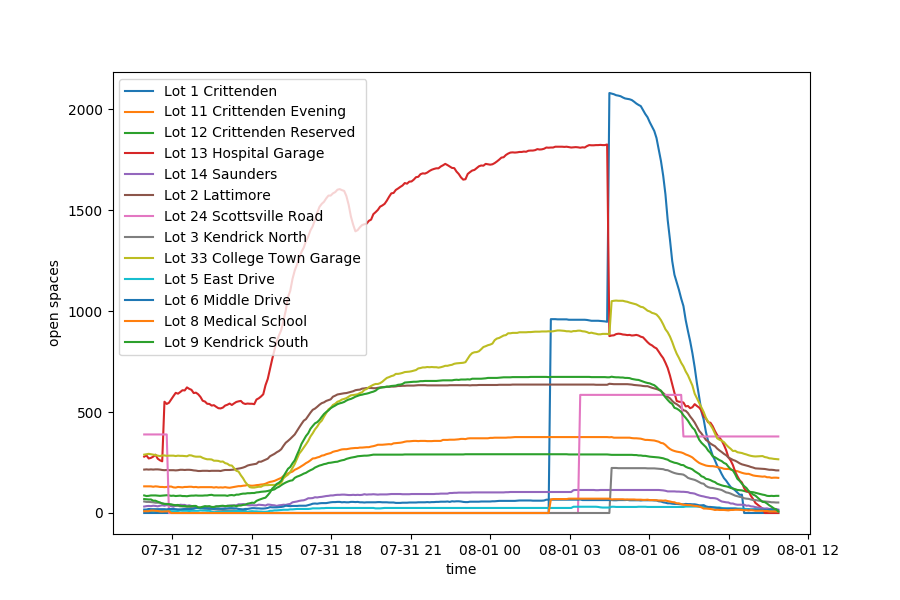

In [19]:
for lot in lots:
    lot1_times, lot1_spaces = get_lot_history(lot)
    plt.plot(lot1_times, lot1_spaces, label=lot)
plt.legend()
plt.xlabel('time')
plt.ylabel('open spaces')
plt.show()

In [20]:
# TODO: fill rate, i.e. -dspots/dt, which should show when people are arriving
# TODO: histograms once we have more data

# Testing:

In [2]:
status = lot_monitor.get_current_status()

In [3]:
status

{'Lot 1 Crittenden': 0,
 'Lot 11 Crittenden Evening': 184,
 'Lot 12 Crittenden Reserved': 96,
 'Lot 13 Hospital Garage': 41,
 'Lot 14 Saunders': 27,
 'Lot 2 Lattimore': 221,
 'Lot 24 Scottsville Road': 379,
 'Lot 3 Kendrick North': 63,
 'Lot 33 College Town Garage': 279,
 'Lot 5 East Drive': 18,
 'Lot 6 Middle Drive': 17,
 'Lot 8 Medical School': 11,
 'Lot 9 Kendrick South': 75}